# Simple Linear regression
## objetives

After completing this lap, you will able to:

* Use scikit-learn to implement simple linear regression
* Create, train , and test a linear regression model on real data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
The dataset you will use resides at the following url. You can use the url directly with the pandas library to load the datast.

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
50,2014,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,A7,Z,18.8,11.3,15.4,18,354
156,2014,CADILLAC,ATS,COMPACT,2.0,4,AS6,Z,11.3,7.5,9.6,29,221
300,2014,DODGE,CHALLENGER SRT,MID-SIZE,6.4,8,M6,Z,16.8,10.4,13.9,20,320
853,2014,NISSAN,PATHFINDER HYBRID 4WD,SUV - STANDARD,2.5,4,AV,X,9.1,8.5,8.8,32,202
130,2014,BMW,X5 xDRIVE35i,SUV - STANDARD,3.0,6,A8,Z,12.9,8.8,11.1,25,255


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG. 

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no interesting information content.

#### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1037,2.0,4,9.0,207
24,2.0,4,9.3,214
432,3.6,6,12.3,283
677,3.5,6,11.8,271
48,4.2,8,14.6,336
758,4.7,8,15.6,359
466,2.4,4,10.0,230
933,2.5,4,9.0,207
831,2.0,4,9.0,207


#### Visualize features
Consider the histograms for each of these features.

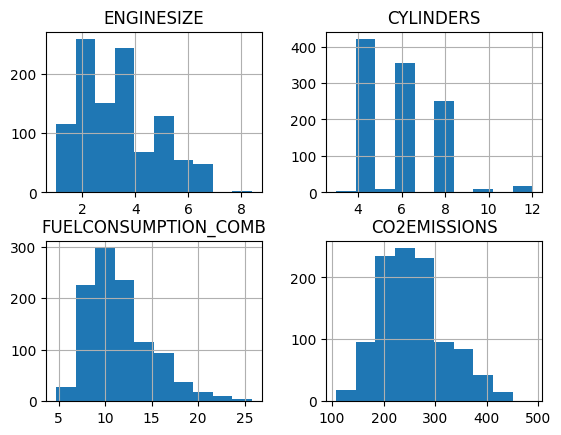

In [5]:
cdf.hist()
plt.show()

In [6]:
# extracting the 'ENGINESIZE' column and its histogram information
counts, bin_edges = np.histogram(cdf['ENGINESIZE'])
print("Counts in each bin:", counts)
print("Bin edges:", bin_edges)

Counts in each bin: [115 258 151 243  68 128  54  48   0   2]
Bin edges: [1.   1.74 2.48 3.22 3.96 4.7  5.44 6.18 6.92 7.66 8.4 ]



As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.  
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.



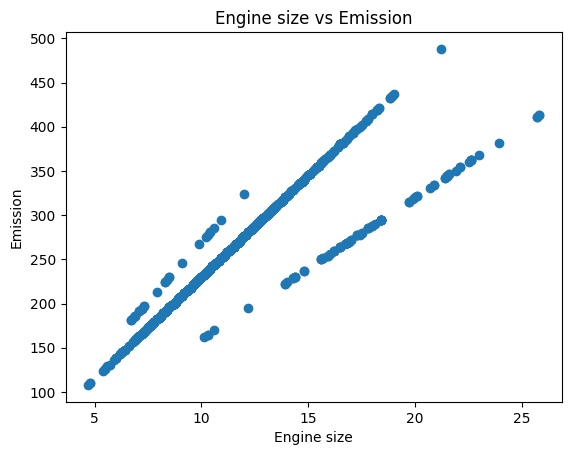

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine size vs Emission")
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. 
Their intercepts are similar, while they noticeably differ in their slopes.

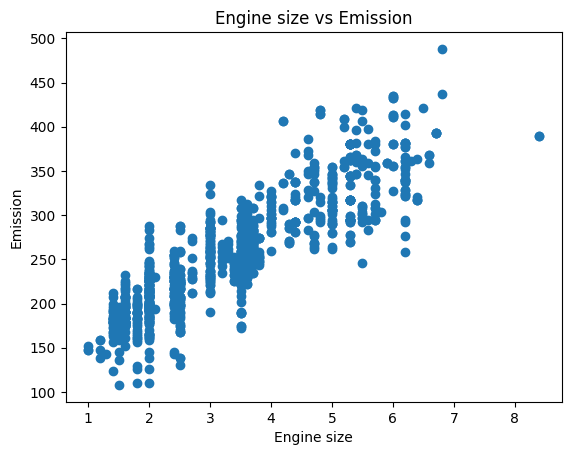

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine size vs Emission")
plt.show()

Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.

#### Practice excercise 1
Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.


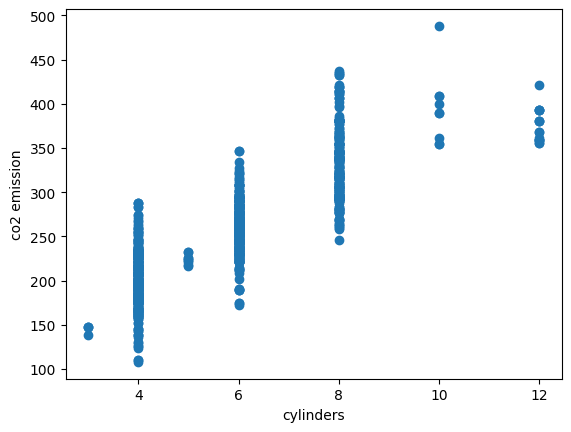

In [9]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("cylinders")
plt.ylabel("co2 emission")
plt.show()

### Extract the input feature and labels from the dataset
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.  
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.

The code:
```python
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()
```
extracts two columns from your DataFrame `cdf`:

- `X` will be a NumPy array containing all the values from the `ENGINESIZE` column (the input feature).
- `y` will be a NumPy array containing all the values from the `CO2EMISSIONS` column (the target label).

This prepares your data for machine learning, as most ML libraries (like scikit-learn) expect input features and labels as NumPy arrays rather than pandas Series or DataFrames. Here, you are setting up to predict CO2 emissions based on engine size using a linear regression model.

In [10]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.


In [11]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

### Build a simple linear regression model 

You'll use scikit-learn to build your model as follows. See [Scikit-learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.

In [12]:
from sklearn import linear_model

# Create a model object
regressor = linear_model.LinearRegression()

# train the model on the traning data
# X_train is  a 1-D array but sklearn models expect a 2D as input for the training data 
# The 2D array have shape (n_observation, n_features)
# So we need to reshape it. We can let it infer the number of oobservations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0])
# with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Here, __Coefficient__ and __Intercept__ are the regression parameters determined by the model.  
They define the slope and intercept of the 'best-fit' line to the training data. 

### Visualize model outputs

You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.


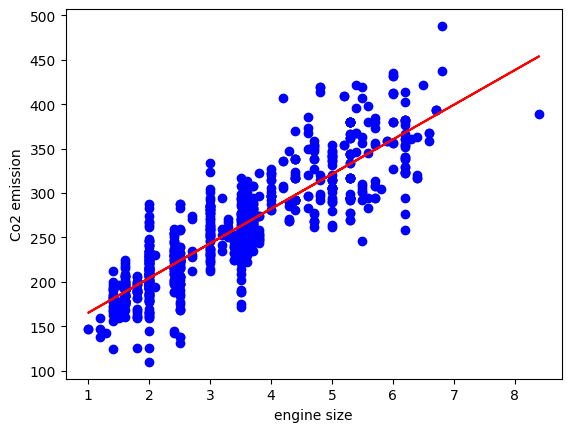

In [16]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_, '-r')
plt.xlabel("engine size")
plt.ylabel("Co2 emission")
plt.show()

#### Model evaluation
You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Use the predict method to make test predictions
y_test_ = regressor.predict(x_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Here, __Coefficient__ and __Intercept__ are the regression parameters determined by the model.  
They define the slope and intercept of the 'best-fit' line to the training data. 


## Practice exercises

#### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


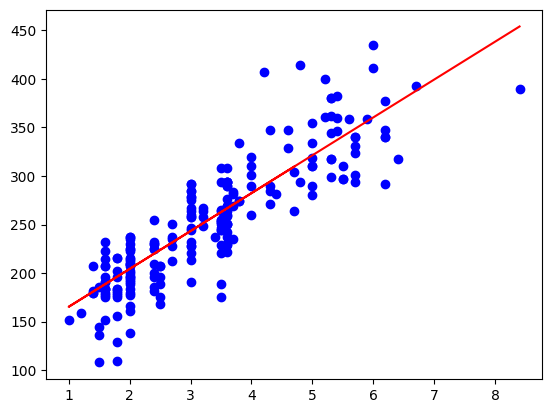

In [18]:
plt.scatter(x_test,y_test, color="blue")
plt.plot(x_test, regressor.coef_*x_test+regressor.intercept_, '-r')

Let's see the evaluation metrics if you train a regression model using the `FUELCONSUMPTION_COMB` feature.

#### 2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets. 
Use the same random state as previously so you can make an objective comparison to the previous training result.

In [19]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train , test_size=0.2, random_state=42)




#### 3.  Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array. 


In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train.reshape(-1, 1), y_train)

print("The Coefficient is %.2f" % regr.coef_[0])
print("the intercept is %.2f"%regr.intercept_)

The Coefficient is 39.79
the intercept is 123.71


#### 4. Use the model to make test predictions on the fuel consumption testing data.


#### 5. Calculate and print the Mean Squared Error of the test predictions.


In [22]:
# ADD CODE

As you might expect from your exploratory analysis, the MSE is smaller when we train using `FUELCONSUMPTION_COMB` rather than `ENGINESIZE`.
